### Import the required libraries.

In [9]:
import warnings

# Disable warnings emitted by warnings.warn calls from different packages
# matplotlib can show a warning with tight_layout that can be safely ignored

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Set up Matplotlib Configurations
plt.style.use('bmh')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [2]:
# Import dataframe
df = pd.read_excel('Data/hotdog-places.xlsm', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2000,2001.0,2002.0,2003.0,2004.0,2005,2006,2007,2008,2009.0,2010
1,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
2,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
3,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [3]:
### Take the transpose of the data and create/name the columns as header

df_t = df.transpose()

# Rename the column names so that they are easier to call.
df_t.columns = ['Year', 'First', 'Second', 'Third']

df_t.head()

,Year,First,Second,Third
0,2000.0,25.0,24.0,22.0
1,2001.0,50.0,31.0,23.5
2,2002.0,50.5,26.0,25.5
3,2003.0,44.5,30.5,29.5
4,2004.0,53.5,38.0,32.0


In [4]:
df_t.Year = df_t.Year.astype(int)

# Bar plot

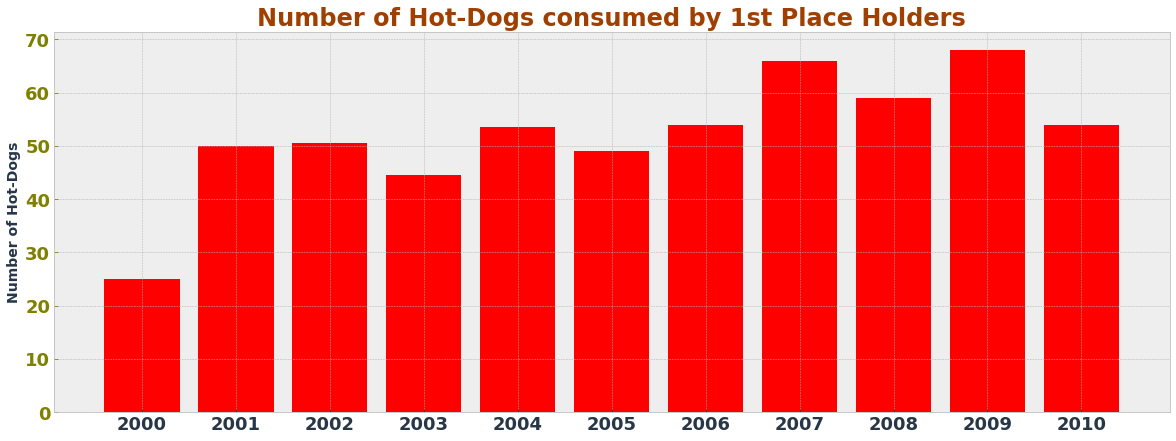

In [5]:
plt.figure(figsize=(20, 7))

plt.bar(df_t['Year'], df_t['First'], color = 'r')
plt.title('Number of Hot-Dogs consumed by 1st Place Holders', fontsize = 24)
plt.ylabel('Number of Hot-Dogs', fontsize = 14)
plt.xticks(df_t['Year'])
plt.show()

# Stacked bar plot

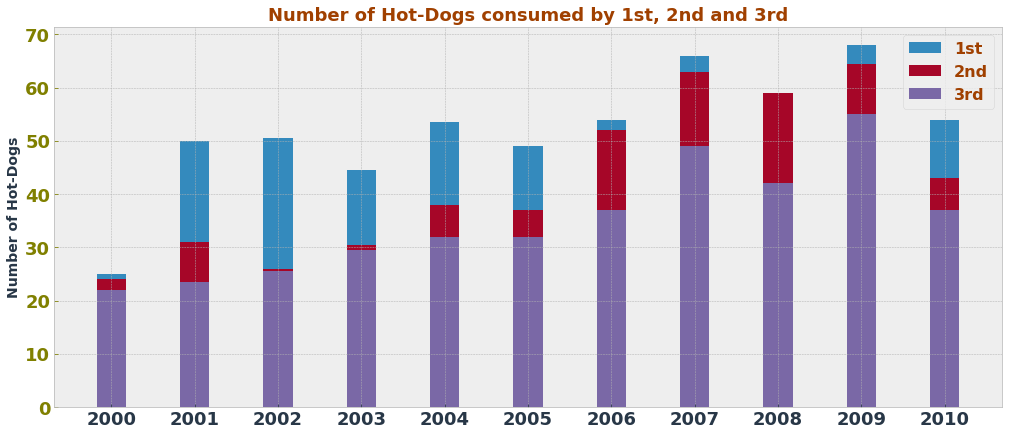

In [6]:
fig, ax = plt.subplots(figsize = (17, 7))

ax.bar(df_t.Year, df_t.First, 0.35, label='1st')
ax.bar(df_t.Year, df_t.Second, 0.35, label='2nd')
ax.bar(df_t.Year, df_t.Third, 0.35, label='3rd')

ax.set_ylabel('Number of Hot-Dogs', size = 14)
ax.set_title('Number of Hot-Dogs consumed by 1st, 2nd and 3rd', size = 18)
ax.set_xticks(df_t['Year'])
ax.legend()
plt.show()

# Pie chart

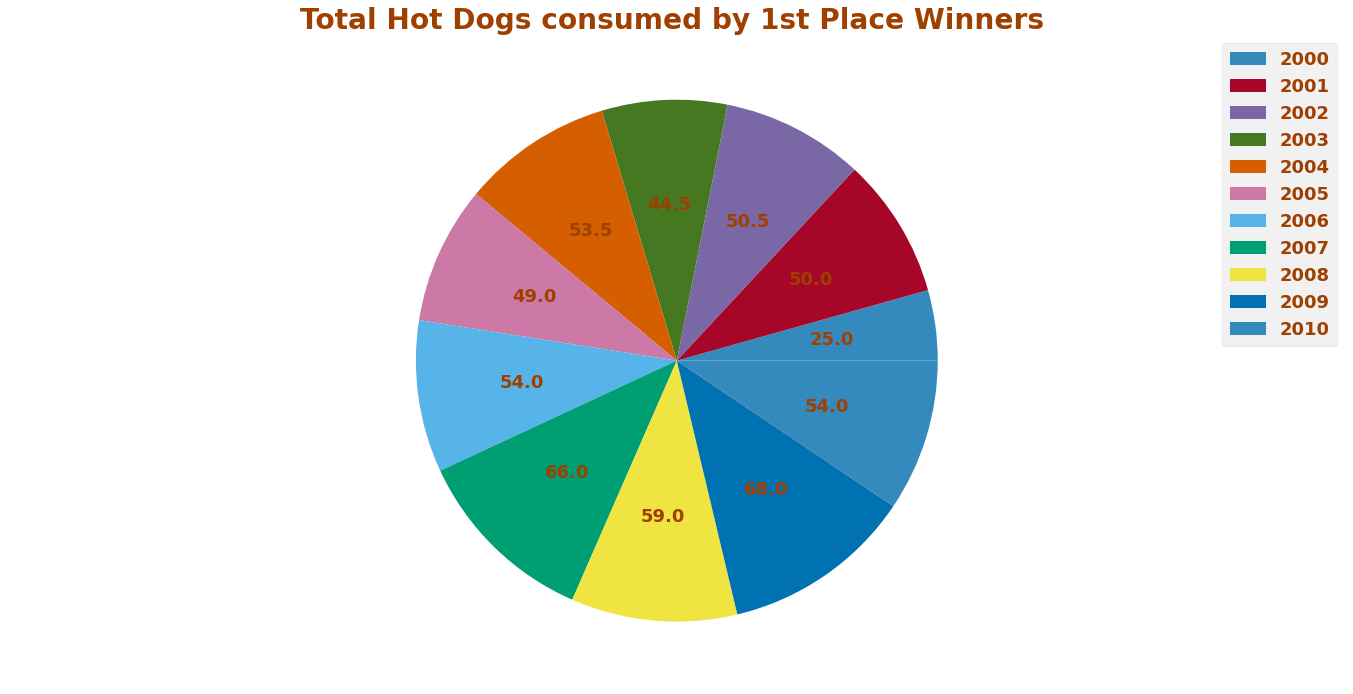

In [7]:
sizes = df_t['First']
fig, ax1 = plt.subplots(figsize = (24,12))
labels = df_t['Year']

def absolute_value(val):
    a  = np.round(val/100*sizes.sum(), decimals = 1)
    return a

ax1.axis('equal')
wedges, texts, autotexts = ax1.pie(sizes, autopct = absolute_value)

ax1.legend(wedges,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=18)
ax1.legend(labels, loc = 'upper right', fontsize = 18) 
plt.title('Total Hot Dogs consumed by 1st Place Winners ', fontsize = 28)
plt.show()


# Donut chart

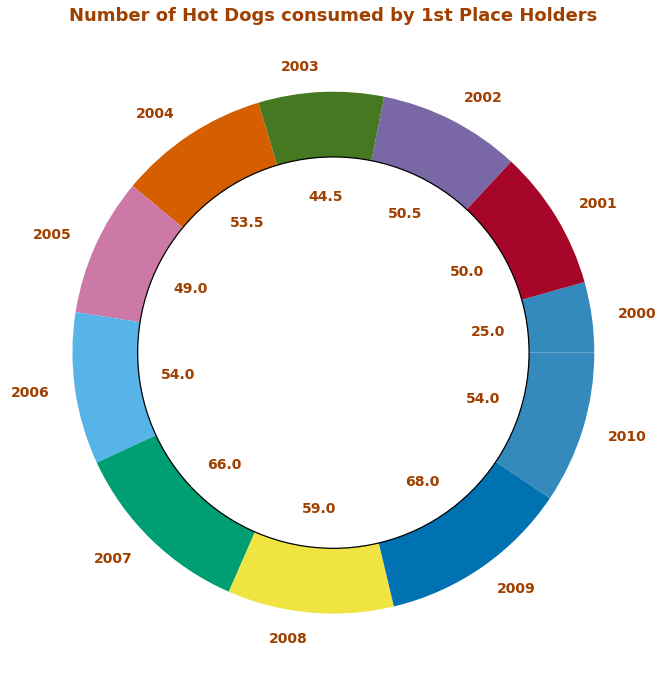

In [8]:
sizes2 = df_t['First']
fig, ax1 = plt.subplots(figsize = (24,12))
labels2 = df_t['Year']

plt.pie(sizes2, labels=labels2,
        autopct= absolute_value, textprops={'fontsize': 14})
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Number of Hot Dogs consumed by 1st Place Holders', fontsize = 18)
plt.show()